In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
t = np.linspace(0, 10, 51)

In [10]:
f = np.cos(t)

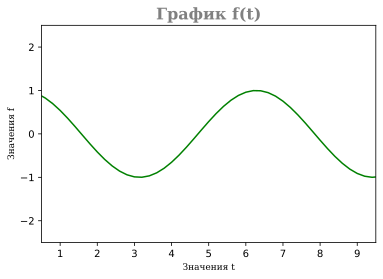

In [16]:
title_font = {
    "fontsize": 16,
    "fontweight": "bold",
    "color": "#808080",
    "family": "serif",
}

label_font = {
    "fontsize": 9,
    "family": "serif",
}

plt.plot(t, f, color="green")

plt.title("График f(t)", fontdict=title_font)
plt.xlabel("Значения t", fontdict=label_font)
plt.ylabel("Значения f", fontdict=label_font)

plt.axis([0.5, 9.5, -2.5, 2.5])

plt.show()